In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [3]:
train_data = pd.read_csv('volcanoesvenus/Volcanoes_train/train_images.csv', header=None)
train_labels = pd.read_csv('volcanoesvenus/Volcanoes_train/train_labels.csv')

test_data = pd.read_csv('volcanoesvenus/Volcanoes_test/test_images.csv', header=None)
test_labels = pd.read_csv('volcanoesvenus/Volcanoes_test/test_labels.csv')

In [4]:
train_data.head() 
#each row is now an image. columns are pixels. 12100 columns (all the 110 rows of 110 columns).
#row 1 consisting of 110 columns, row 2 consisting of 110 columns, etc...

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115


In [200]:
train_labels.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


In [5]:
scaler = preprocessing.MinMaxScaler()

train_data = pd.DataFrame(scaler.fit_transform(train_data))
test_data = pd.DataFrame(scaler.fit_transform(test_data))

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


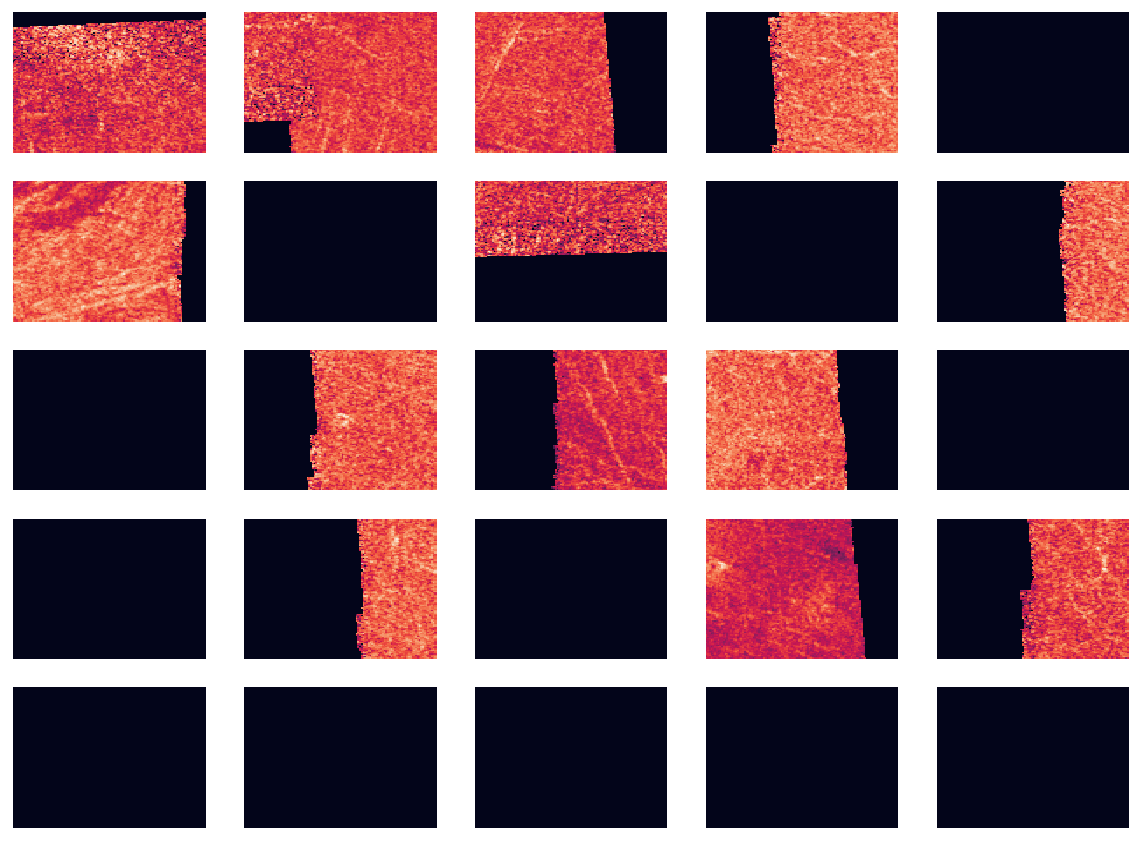

In [199]:
index_corrupt = train_data.loc[(train_data==0).any(axis=1)].index

plt.figure(figsize=(20,15))
#plt.suptitle('\n\nExample of corrupted images', size=20) 
for i, val in enumerate(index_corrupt[:25]):
    plt.subplot(5,5,i+1)
    sns.heatmap(np.array(train_data.iloc[val]).reshape(110,110), 
                cbar=False, xticklabels=False, yticklabels=False)
plt.savefig('Corrupted Images')
plt.show()

In [7]:
#removing any corrupted data - for now, lets remove any image that has any 0 pixel value.
#setting X and y for training 

#taking all pixel values except for the rows which contain any 0 pixel value
Xtrain = train_data.loc[~(train_data==0).any(axis=1)] 
Xtrain = Xtrain.reset_index(drop=True)


train_labels_drop = train_labels.drop(index_corrupt, 0)
train_labels_drop = train_labels_drop.reset_index(drop=True)
train_labels_drop.fillna(value=0,inplace=True)

#binary outcome
ytrain = train_labels_drop['Volcano?']

In [8]:
print('There are {} corrupted images of {} images\n'.format(len(train_data) - len(Xtrain), len(train_data)))
print(Xtrain.head())
print(ytrain.head())

There are 271 corrupted images of 7000 images

      0         1         2         3         4         5         6      \
0  0.500000  0.543011  0.532258  0.547872  0.494792  0.450262  0.487310   
1  0.478947  0.494624  0.489247  0.473404  0.479167  0.486911  0.487310   
2  0.457895  0.376344  0.387097  0.393617  0.437500  0.408377  0.472081   
3  0.600000  0.634409  0.666667  0.632979  0.494792  0.617801  0.532995   
4  0.415789  0.510753  0.483871  0.436170  0.380208  0.387435  0.390863   

      7         8         9        ...        12090     12091     12092  \
0  0.440594  0.346535  0.530612    ...     0.557789  0.563158  0.500000   
1  0.500000  0.529703  0.530612    ...     0.517588  0.484211  0.505435   
2  0.514851  0.524752  0.540816    ...     0.422111  0.373684  0.516304   
3  0.574257  0.608911  0.571429    ...     0.582915  0.594737  0.554348   
4  0.371287  0.405941  0.443878    ...     0.452261  0.421053  0.429348   

      12093     12094     12095     12096     12097

In [9]:
#removing any corrupted data - for now, lets remove any image that has any 0 pixel value.
#setting X and y for testing 
index_corrupt = test_data.loc[(test_data==0).any(axis=1)].index

Xtest = test_data.loc[~(test_data==0).any(axis=1)]
Xtest = Xtest.reset_index(drop=True)

test_labels_drop = test_labels.drop(index_corrupt, 0)
test_labels_drop = test_labels_drop.reset_index(drop=True)
test_labels_drop.fillna(value=0,inplace=True)

#binary outcome
ytest = test_labels_drop['Volcano?']

print('There are {} corrupted images of {} images\n'.format(len(test_data) - len(Xtest), len(test_data)))
print(Xtest.head())
print(ytest.head())

There are 107 corrupted images of 2734 images

      0         1         2         3         4         5         6      \
0  0.569149  0.640884  0.574468  0.528796  0.594444  0.622857  0.574468   
1  0.494681  0.524862  0.521277  0.523560  0.500000  0.571429  0.574468   
2  0.574468  0.596685  0.489362  0.607330  0.644444  0.800000  0.670213   
3  0.877660  0.906077  0.829787  0.832461  0.838889  0.685714  0.547872   
4  0.558511  0.585635  0.446809  0.602094  0.672222  0.588571  0.500000   

      7         8         9        ...        12090     12091     12092  \
0  0.607735  0.534759  0.579787    ...     0.587302  0.632184  0.561856   
1  0.541436  0.481283  0.547872    ...     0.455026  0.534483  0.304124   
2  0.574586  0.598930  0.547872    ...     0.624339  0.637931  0.582474   
3  0.629834  0.609626  0.617021    ...     0.365079  0.551724  0.561856   
4  0.596685  0.550802  0.484043    ...     0.486772  0.511494  0.494845   

      12093     12094     12095     12096     12097

In [229]:
len(ytest)

2627

In [215]:
print(np.sum(ytrain.values == 1)/len(ytrain.values))
print(np.sum(ytest.values == 1)/len(ytest.values))

0.1459355030465151
0.16368481157213552


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


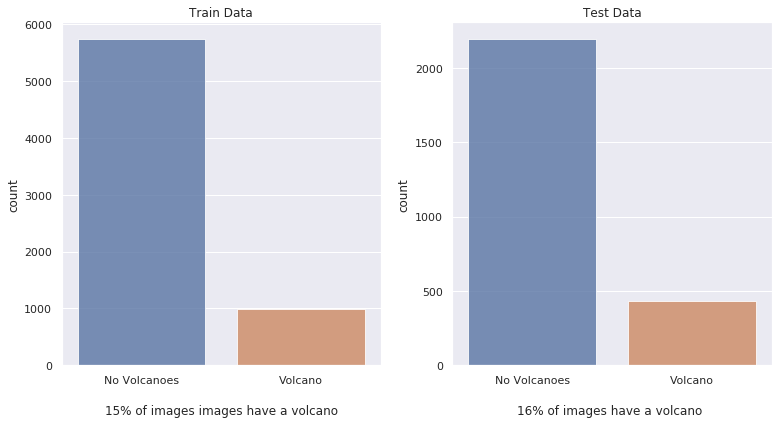

In [222]:
fig, ax = plt.subplots(1,2, figsize=(11,6))

diff_train = np.sum(ytrain.values == 1)/len(ytrain.values)
diff_test = np.sum(ytest.values == 1)/len(ytest.values)

sns.countplot(x=ytrain.values, y=None, alpha=.8, ax=ax[0])
sns.countplot(x=ytest.values, y=None, alpha=.8, ax=ax[1])

ax[0].set_title('Train Data')
ax[0].set_xticklabels(['No Volcanoes', 'Volcano'])
ax[0].set_xlabel('\n{:.0f}% of images images have a volcano'.format(diff_train*100))

ax[1].set_title('Test Data')
ax[1].set_xticklabels(['No Volcanoes', 'Volcano'])
ax[1].set_xlabel('\n{:.0f}% of images have a volcano '.format(diff_test*100))

fig.show()
plt.savefig('Class Imbalance')
plt.tight_layout()
#note this is an example of class imbalance

This shows class imbalance. If my model predicts no volcanos at all, then my $R^2$ could still be at 83% on the train data. 

count    6729.000000
mean        0.537107
std         0.076947
min         0.382311
25%         0.479143
50%         0.525634
75%         0.588036
max         0.833071
dtype: float64


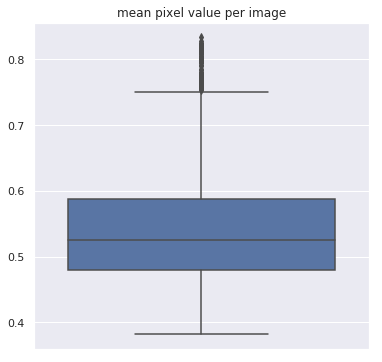

In [11]:
print(Xtrain.mean(axis=1).describe())

plt.figure(figsize=(6,6))
sns.boxplot(y=Xtrain.mean(axis=1))
plt.title('mean pixel value per image')
plt.show()

# I don't see anything too crazy

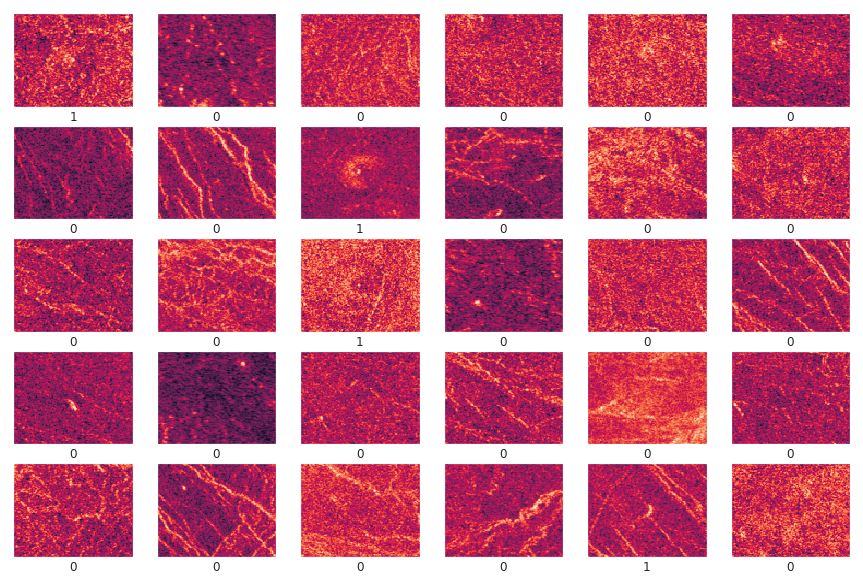

In [197]:
fig, ax = plt.subplots(5, 6, figsize=(15,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(np.array(Xtrain.iloc[i]).reshape(110,110), aspect='auto')
    axi.set(xticks=[], yticks=[],
           xlabel=ytrain[i])
plt.savefig('Venus Images')
plt.show()

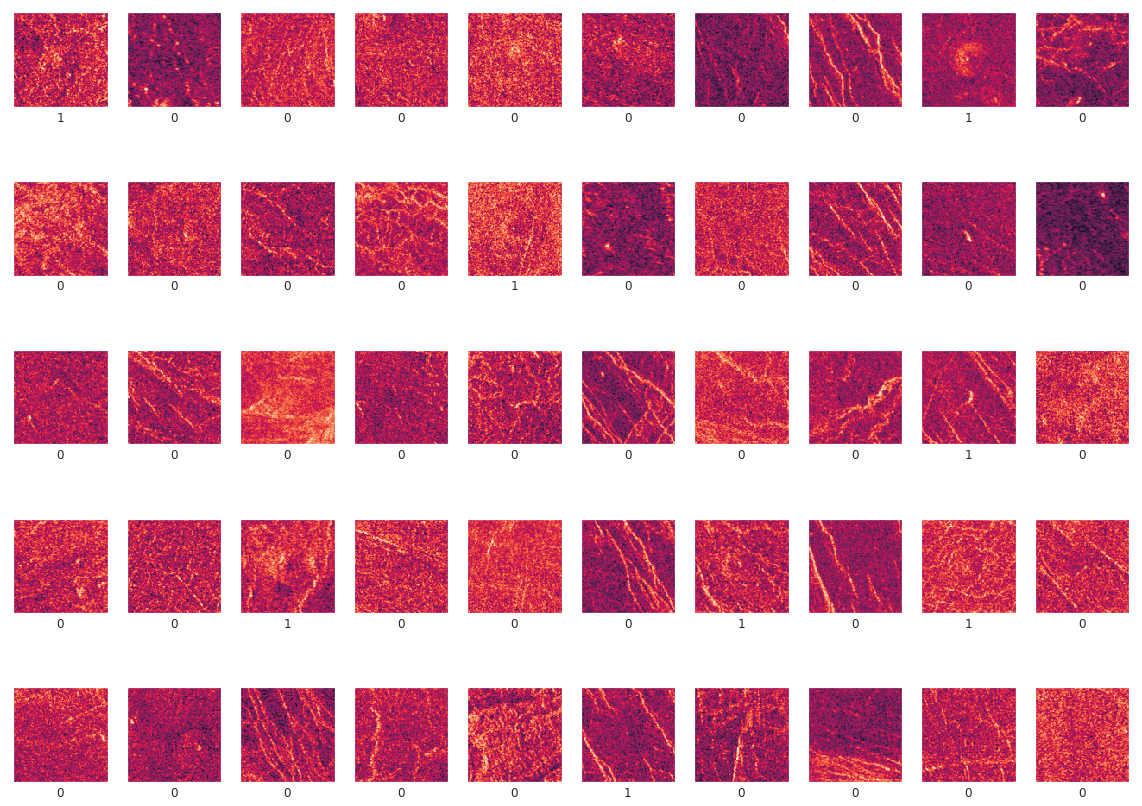

In [185]:
fig, ax = plt.subplots(5, 10, figsize=(20,15))
for i, axi in enumerate(ax.flat):
    axi.imshow(np.array(Xtrain.iloc[i]).reshape(110,110))
    axi.set(xticks=[], yticks=[],
           xlabel=ytrain[i])
plt.savefig('Venus Images')
plt.show()

In [238]:
SVC?

In [239]:
c_vals = [1, 10, 50, 100]
gamma_vals = [0.0001, 0.001, .005, .01]

score_train = []
score_test = []

cv_train = []
cv_test = []

for i in c_vals:
    for j in gamma_vals:
        pca = PCA(n_components=100, random_state=42, svd_solver='randomized')
        svc = SVC(kernel='rbf', C=i, gamma=j) #The balanced wight was causing overfitting
        model = make_pipeline(pca, svc)
        model.fit(Xtrain, ytrain)
        
        score_train.append(model.score(Xtrain, ytrain))
        score_test.append(model.score(Xtest, ytest))
        
        cv_train.append(np.mean(cross_val_score(model, Xtrain, ytrain, cv=3)))
        cv_test.append(np.mean(cross_val_score(model, Xtest, ytest, cv=3)))
%time

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 16.9 µs


In [240]:
train = (np.array(score_train)).reshape(4,4)
test = (np.array(score_test)).reshape(4,4)

cv_train = (np.array(cv_train)).reshape(4,4)
cv_test = (np.array(cv_test)).reshape(4,4)

In [241]:
df_train = pd.DataFrame(train*100)
df_train.index = c_vals
df_train.columns = gamma_vals


df_test = pd.DataFrame(test*100)
df_test.index = c_vals
df_test.columns = gamma_vals

diff1 = df_train - df_test

df_cv_train = pd.DataFrame(cv_train*100)
df_cv_train.index = c_vals
df_cv_train.columns = gamma_vals


df_cv_test = pd.DataFrame(cv_test*100)
df_cv_test.index = c_vals
df_cv_test.columns = gamma_vals

diff2 = df_cv_train - df_cv_test

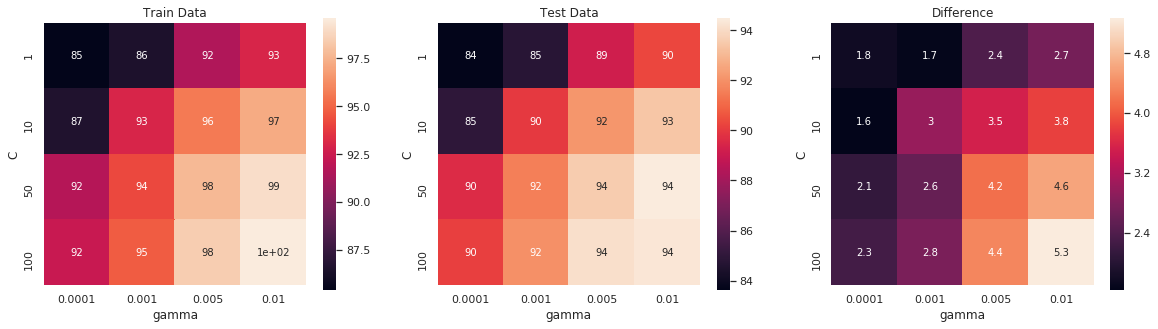

<Figure size 432x288 with 0 Axes>

In [242]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))

g2 = sns.heatmap(df_train,ax=ax1, square=True, annot=True)
g2.set_title('Train Data')
g2.set_xlabel('gamma')
g2.set_ylabel('C')

g3 = sns.heatmap(df_test, ax=ax2, square=True, annot=True)
g3.set_title('Test Data')
g3.set_xlabel('gamma')
g3.set_ylabel('C')

g1 = sns.heatmap(diff1,ax=ax3, square=True, annot=True)
g1.set_title('Difference')
g1.set_xlabel('gamma')
g1.set_ylabel('C')


plt.savefig('SVC C gamma plot 1')
plt.show()
plt.tight_layout()

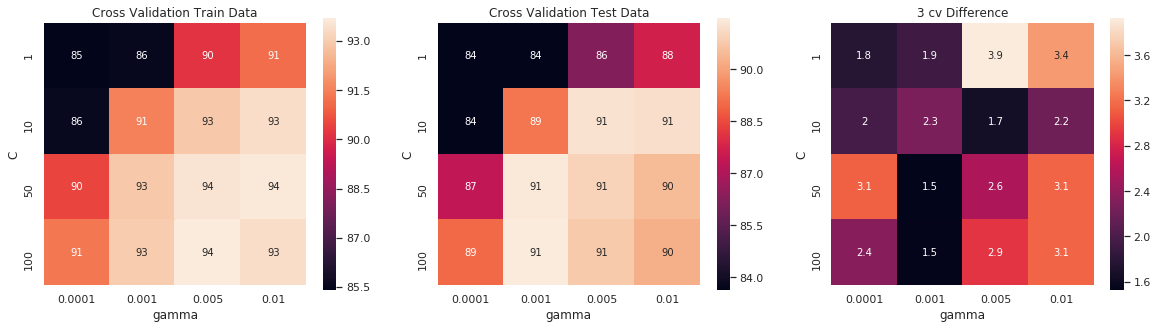

<Figure size 432x288 with 0 Axes>

In [243]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))

g2 = sns.heatmap(df_cv_train,ax=ax1, square=True, annot=True)
g2.set_title('Cross Validation Train Data')
g2.set_xlabel('gamma')
g2.set_ylabel('C')

g3 = sns.heatmap(df_cv_test, ax=ax2, square=True, annot=True)
g3.set_title('Cross Validation Test Data')
g3.set_xlabel('gamma')
g3.set_ylabel('C')

g1 = sns.heatmap(diff2, ax=ax3, square=True, annot=True)
g1.set_title('3 cv Difference')
g1.set_xlabel('gamma')
g1.set_ylabel('C')

plt.savefig('SVC C gamma plot 2')
plt.show()
plt.tight_layout()

In [247]:
pca = PCA(n_components=100, random_state=42, svd_solver='randomized')
svc = SVC(kernel='rbf', C = 50, gamma=0.001) #The balanced weight was causing overfitting
model = make_pipeline(pca, svc)

model.fit(Xtrain, ytrain)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=100, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)), ('svc', SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [13]:
# param_grid={'svc__C': [30, 50, 60],
#            'svc__gamma': [0.01, 0.05, .1, .5]}

# grid = GridSearchCV(model, param_grid, cv=3)

# %time grid.fit(Xtrain, ytrain)
# print(grid.best_params_)
# print(grid.best_score_)

CPU times: user 11min 44s, sys: 1min 5s, total: 12min 49s
Wall time: 9min 44s
{'svc__C': 50, 'svc__gamma': 0.01}
0.9362460989745877


In [248]:
yfit = model.predict(Xtest)
trainfit = model.predict(Xtrain)
testscore = model.score(Xtest, ytest)
trainscore = model.score(Xtrain, ytrain)
print('Train Score',trainscore)
print('Test Score:',testscore)

Train Score 0.9417446871749146
Test Score: 0.9158736200989722


In [249]:
cv_train = cross_val_score(model, Xtrain, ytrain, cv=3)
cv_test = cross_val_score(model, Xtest, ytest, cv=3)

In [250]:
print('Train data 3 fold cross validation score: \n {} \n {:.2f} +/- {:.2f}\n'.format(cv_train, np.mean(cv_train)*100, np.std(cv_train)*200))
print('Test data 3 fold cross validation score: \n {} \n {:.2f} +/- {:.2f}'.format(cv_test, np.mean(cv_test)*100, np.std(cv_test)*200))

Train data 3 fold cross validation score: 
 [0.93092692 0.93045029 0.926405  ] 
 92.93 +/- 0.41

Test data 3 fold cross validation score: 
 [0.90763968 0.91428571 0.92      ] 
 91.40 +/- 1.01


In [251]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=('No Volcano - 0', 'Volcano - 1')))

                precision    recall  f1-score   support

No Volcano - 0       0.92      0.99      0.95      2197
   Volcano - 1       0.89      0.55      0.68       430

     micro avg       0.92      0.92      0.92      2627
     macro avg       0.91      0.77      0.82      2627
  weighted avg       0.91      0.92      0.91      2627



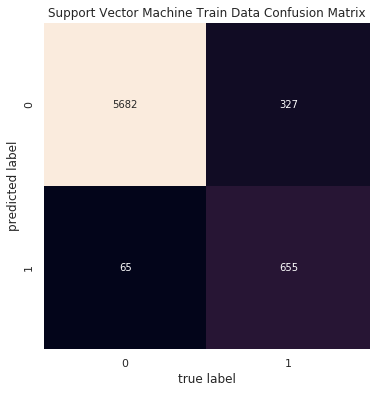

In [252]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytrain, trainfit)
plt.figure(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Support Vector Machine Train Data Confusion Matrix')

plt.savefig('Support Vector Machine Train Data Confusion Matrix')
plt.show()

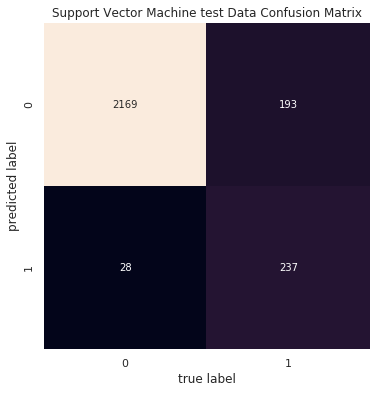

In [253]:
mat = confusion_matrix(ytest, yfit)
plt.figure(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Support Vector Machine test Data Confusion Matrix')

plt.savefig('Support Vector Machine test Data Confusion Matrix')
plt.show()

In [254]:
# Accuracy tables.
table_train = pd.crosstab(ytrain, trainfit, margins=True)
train_tI_errors = table_train.loc[0.0,1.0]/table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0]/table_train.loc['All','All']

print((
    'Train set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors))


# Accuracy tables.
table_test = pd.crosstab(ytest, yfit, margins=True)
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(test_tI_errors, test_tII_errors))

Train set accuracy:
Percent Type I errors: 0.009659681973547333
Percent Type II errors: 0.04859563085153812
Test set accuracy:
Percent Type I errors: 0.010658545869813475
Percent Type II errors: 0.07346783403121432


In [244]:
print(table_test.loc[0.0,1.0])

28


In [245]:
table_test.loc['All','All']

2627

In [246]:
len(ytest)

2627